In [4]:
actions = ['U', 'D', 'R', 'L']
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ,13, 14, 15]

# Dimensions : [ S x A x 2 ]

MDP = [[[4, -1], [0, -1], [1, -1], [0, -1]],
       [[5, -1], [1, -1], [2, -1], [0, -1]],
       [[6, -1], [2, -1], [3, -1], [1, -1]],
       [[7, -1], [3, -1], [3, -1], [2, -1]],
       [[8, -1], [0, -1], [5, -1], [4, -1]],
       [[9, -1], [1, -1], [6, -1], [4, -1]],
       [[10, -1], [2, -1], [7, -1], [5, -1]],
       [[11, -1], [3, -1], [7, -1], [6, -1]],
       [[12, -1], [4, -1], [9, -1], [8, -1]],
       [[13, -1], [5, -1], [10, -1], [8, -1]],
       [[14, -1], [6, -1], [11, -1], [9, -1]],
       [[15, -1], [7, -1], [11, -1], [10, -1]],
       [[12, -1], [8, -1], [13, -1], [12, -1]],
       [[13, -1], [9, -1], [14, -1], [12, -1]],
       [[14, -1], [10, -1], [15, -1], [13, -1]],
       [[15, -1], [11, -1], [15, -1], [14, -1]]]

print(f'Markov Decision Process: \n')
for r, a in enumerate(MDP):
    for c, s in enumerate(a):
        print(f"a = {actions[c]}, s' = {r}, s = {s[0]}, r = {s[1]}")
    if r == 4: break

Markov Decision Process: 

a = U, s' = 0, s = 4, r = -1
a = D, s' = 0, s = 0, r = -1
a = R, s' = 0, s = 1, r = -1
a = L, s' = 0, s = 0, r = -1
a = U, s' = 1, s = 5, r = -1
a = D, s' = 1, s = 1, r = -1
a = R, s' = 1, s = 2, r = -1
a = L, s' = 1, s = 0, r = -1
a = U, s' = 2, s = 6, r = -1
a = D, s' = 2, s = 2, r = -1
a = R, s' = 2, s = 3, r = -1
a = L, s' = 2, s = 1, r = -1
a = U, s' = 3, s = 7, r = -1
a = D, s' = 3, s = 3, r = -1
a = R, s' = 3, s = 3, r = -1
a = L, s' = 3, s = 2, r = -1
a = U, s' = 4, s = 8, r = -1
a = D, s' = 4, s = 0, r = -1
a = R, s' = 4, s = 5, r = -1
a = L, s' = 4, s = 4, r = -1


In [5]:
# Dimension : [ S x A ]

pi = [[0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25],
      [0.25, 0.25, 0.25, 0.25]]

print(f'Equal Random Policy: \n')
for r, s in enumerate(pi):
    for c, a in enumerate(s):
        print(f's = {r}, a = {actions[c]}, p = {a}')
    if r == 4: break

Equal Random Policy: 

s = 0, a = U, p = 0.25
s = 0, a = D, p = 0.25
s = 0, a = R, p = 0.25
s = 0, a = L, p = 0.25
s = 1, a = U, p = 0.25
s = 1, a = D, p = 0.25
s = 1, a = R, p = 0.25
s = 1, a = L, p = 0.25
s = 2, a = U, p = 0.25
s = 2, a = D, p = 0.25
s = 2, a = R, p = 0.25
s = 2, a = L, p = 0.25
s = 3, a = U, p = 0.25
s = 3, a = D, p = 0.25
s = 3, a = R, p = 0.25
s = 3, a = L, p = 0.25
s = 4, a = U, p = 0.25
s = 4, a = D, p = 0.25
s = 4, a = R, p = 0.25
s = 4, a = L, p = 0.25


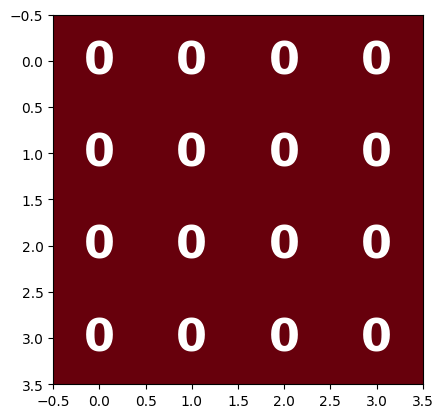

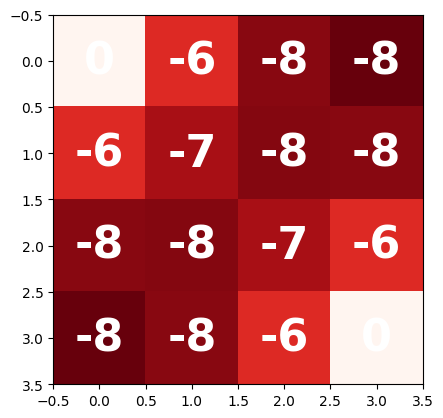

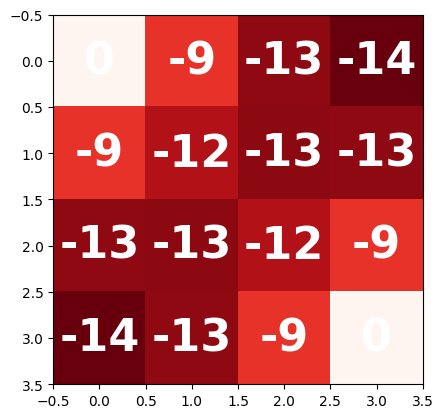

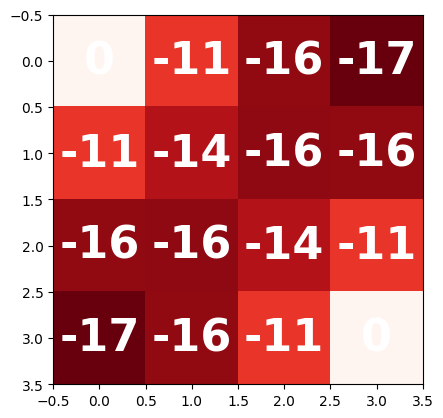

In [52]:
# Dimensions : [ S ]

import numpy as np
import matplotlib.pyplot as plt

GAMMA = 1.0
DELTA = 0.1

V = [0 for _ in range(16)]

def display_values(V):

    V_temp = np.array(V).reshape(4, 4)

    fig, ax = plt.subplots()

    plt.imshow(V_temp, cmap='Reds_r')

    for r in range(len(V_temp)):
        for c in range(len(V_temp[0])):
            ax.text(r, c, int(V_temp[r][c]), color='white', ha='center', va='center', fontweight='bold', fontsize=32)

iteration = 0

while True:

    V_new = [0 for _ in range(16)]

    for s in range(1, len(states) - 1):
    
        val = 0
        
        for a in range(len(pi[s])):
            
            val += pi[s][a] * (MDP[s][a][1] + GAMMA * V[MDP[s][a][0]])
    
        V_new[s] = val

    if abs(V[1] - V_new[1]) < DELTA:
        break

    if iteration % 10 == 0: display_values(V)

    V = V_new

    iteration += 1
